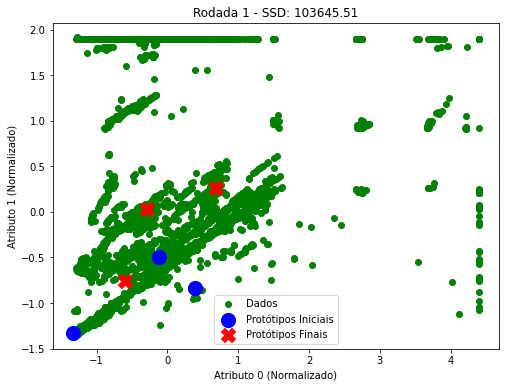

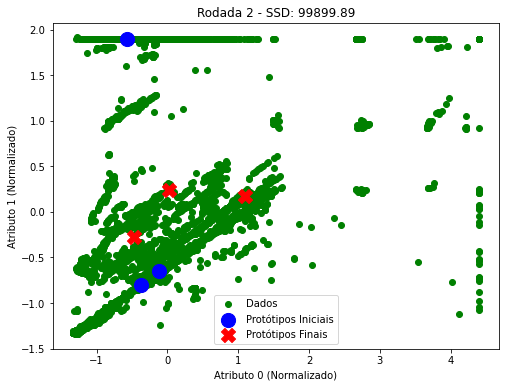

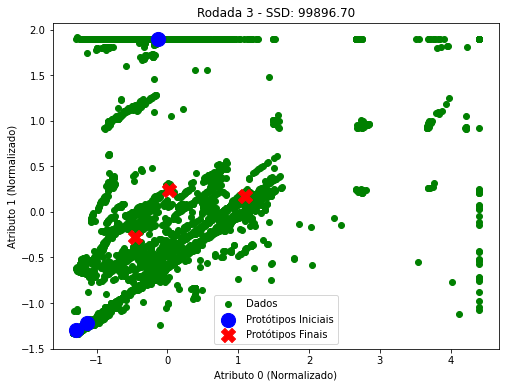

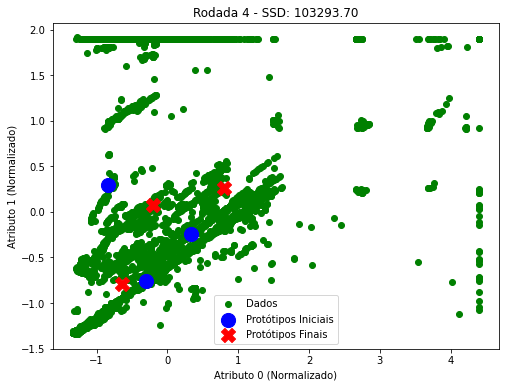

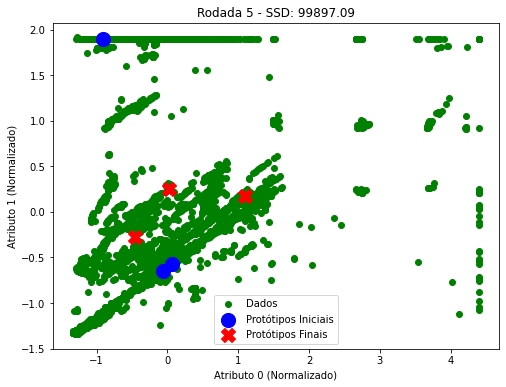

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
url = "sensor_readings_24.data"
data = pd.read_csv(url, header=None)

# Normalizar os dados
normalized_data = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()

# Definir um valor para K (n_clusters)
K = 3
Nr = 5  # Número de rodadas independentes

best_ssd = float('inf')
best_prototypes = None

# Loop sobre as rodadas independentes
for round_num in range(Nr):
    # Atribuir valores iniciais aleatórios aos protótipos
    prototypes = normalized_data.sample(n=K, random_state=round_num * 42)
    initial_prototypes = prototypes.copy()

    # Inicializar variáveis para o loop do algoritmo K-médias
    max_iterations = 20
    convergence_threshold = 1e-4
    iteration = 0

    # Listas para armazenar SSD em cada iteração
    ssd_values = []

    while iteration < max_iterations:
        # Passo 3: Determinar a partição Vi(k)
        distances = np.linalg.norm(normalized_data.values[:, np.newaxis] - prototypes.values, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Atualizar protótipos para a próxima iteração
        new_prototypes = pd.DataFrame(np.array([normalized_data[clusters == i].mean(axis=0) for i in range(K)]),
                                       columns=normalized_data.columns)

        # Verificar convergência
        if np.linalg.norm(new_prototypes.values - prototypes.values) < convergence_threshold:
            prototypes = new_prototypes.copy()
            break

        # Atualizar protótipos para a próxima iteração
        prototypes = new_prototypes.copy()

        # Calcular a SSD após convergência
        ssd = np.sum((normalized_data.values - prototypes.values[clusters]) ** 2)
        ssd_values.append(ssd)

        # Incrementar a iteração
        iteration += 1

    # Escolher os protótipos da rodada que produz o menor valor para SSD
    if ssd_values[-1] < best_ssd:
        best_ssd = ssd_values[-1]
        best_prototypes = prototypes.copy()

    # Exibir os resultados da rodada
    plt.figure(figsize=(8, 6))
    plt.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], c='green', label='Dados')
    plt.scatter(initial_prototypes.iloc[:, 0], initial_prototypes.iloc[:, 1], s=200, marker='o', c='blue', label='Protótipos Iniciais')
    plt.scatter(prototypes.iloc[:, 0], prototypes.iloc[:, 1], s=200, marker='X', c='red', label='Protótipos Finais')
    plt.title(f"Rodada {round_num + 1} - SSD: {ssd:.2f}")
    plt.xlabel("Atributo 0 (Normalizado)")
    plt.ylabel("Atributo 1 (Normalizado)")
    plt.legend()
    plt.show()

# Exibir os melhores protótipos
# plt.figure(figsize=(8, 6))
# plt.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], c='green', label='Dados')
# plt.scatter(best_prototypes.iloc[:, 0], best_prototypes.iloc[:, 1], s=200, marker='X', c='red', label='Melhores Protótipos')
# plt.title(f"Melhores Protótipos - Menor SSD: {best_ssd:.2f}")
# plt.xlabel("Atributo 0 (Normalizado)")
# plt.ylabel("Atributo 1 (Normalizado)")
# plt.legend()
# plt.show()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
url = "sensor_readings_24.data"
data = pd.read_csv(url, header=None)

# Normalizar os dados
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


In [12]:
data.iloc[:, 0]
data.iloc[:, 1]

0       0.498
1       0.498
2       0.498
3       0.501
4       0.498
        ...  
5451    5.000
5452    5.000
5453    5.000
5454    4.052
5455    4.066
Name: 1, Length: 5456, dtype: float64